## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.21.3


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID =  1236916 
np.random.seed(ID)

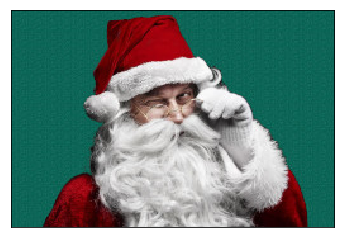

Santa Claus image:  (172, 256, 3)


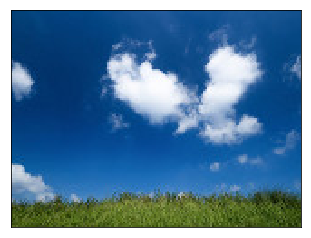

Landscape image:  (120, 160, 3)


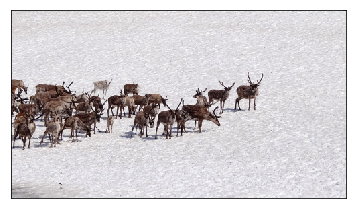

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")



ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


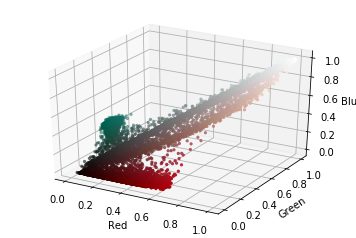

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [6]:
def my_kmeans(points, k): 
    
    max_iters = 50
    
    n = points.shape[0]
    m = points.shape[1]
    
    mean = np.mean(points, axis = 0)
    std = np.std(points, axis = 0)
    
    centroids = np.random.randn(k,m)*std + mean
    previous_centroids = np.zeros((k,m))
    
    clusters = np.zeros(n)
    convergence = np.zeros(max_iters)
    errors = []

    n_iteration = 0   
    
    for it in range(max_iters):
        
        dist = sp.spatial.distance.cdist(points,centroids, 'euclidean')
        
        clusters = np.argmin(dist, axis = 1)
        previous_centroids = deepcopy(centroids)
        
        for i in range(k):
            centroids[i] = np.mean(points[clusters == i], axis=0)
            
        convergence[it] = np.linalg.norm(centroids - previous_centroids)
        
        sqdist_min = np.power(np.min(dist, axis = 1),2)
        error = np.sum(sqdist_min)       
        errors.append(error)    
            
        if( convergence[it]==0 ):    
            n_iteration = it + 1
            print('Convergence reached after:', n_iteration, 'iterations')
            break
            
    return centroids, clusters, errors, n_iteration

## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

Convergence reached after: 15 iterations


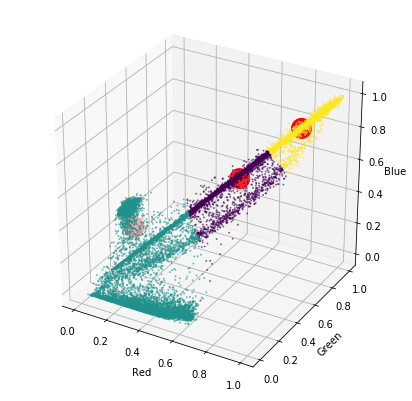

In [7]:
mykmeans_centers,clusters,errors, n_iteration = my_kmeans(data, 3)

fig = pyplot.figure(figsize=(7,7))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:,0], mykmeans_centers[:,1], mykmeans_centers[:,2], c='red', s=400, zorder=10)
pyplot.show()

### TO DO 3: 
Plot the value of the error versus the number of iterations

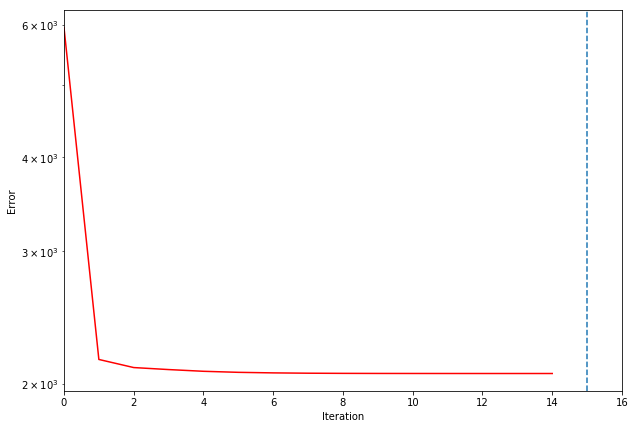

In [8]:
fig = pyplot.figure(figsize=(10,7))
axis = fig.add_subplot(1, 1, 1)
axis.plot(errors,'r')
axis.axvline(n_iteration, ls = '--')
axis.set_xlim(0,n_iteration+1)
axis.set_xlabel('Iteration')
axis.set_ylabel('Error')
axis.set_yscale('log')

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [9]:
kmeans =  KMeans(n_clusters=3, random_state=0, n_init = 10).fit(data)
new_clusters = kmeans.predict(data)
kmeans.labels_
kmeans.cluster_centers_

print('Convergence is reached after', kmeans.n_iter_, 'iterations')

print('kmeans:', kmeans.cluster_centers_)
print('mykmeans:', mykmeans_centers)

Convergence is reached after 4 iterations
kmeans: [[0.77990258 0.77032897 0.76764366]
 [0.0785348  0.39468013 0.34312967]
 [0.39261987 0.05373938 0.06700409]]
mykmeans: [[0.61660216 0.59361519 0.58745973]
 [0.13223348 0.32213292 0.28282932]
 [0.8440952  0.83904674 0.83784112]]


### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

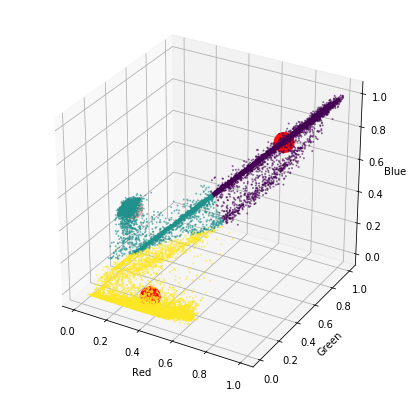

In [10]:
fig = pyplot.figure(figsize=(7,7))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c = new_clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

[ADD YOUR ANSWER HERE]

Using the algorithm I have implemented, with the seed set as my ID number, the convergence is reached after 15 iterations, while I note that using the algorithm provided by sklearn the convergence is reached in just 4 iterations, so the algorithm reaches the convergence faster!
I note that the two plots does not match, indeed the clustering is different with the two algorithm. Maybe, it could be fault of the random initialization I used in the user defined algorithm or it is fault of my ID number. I noted that, using another seed, as for example 123456, the results look correct. Hence, this procedure strongly depends on the initial initialization. 

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

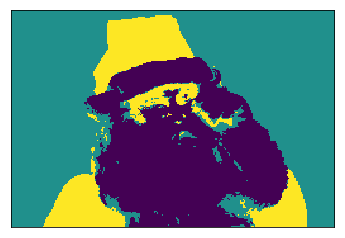

Santa Claus image:  (172, 256)


In [11]:
# ADD CODE TO DISPLAY THE IMAGE OBTAINED USING SKLEARN 

seg_image1_sklearn = deepcopy ( kmeans.labels_.reshape(image1.shape[0],image1.shape[1]))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(seg_image1_sklearn)
plt.show()
print("Santa Claus image: ",seg_image1_sklearn.shape)

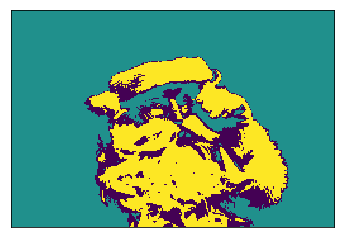

Santa Claus image:  (172, 256)


In [12]:
# ADD CODE TO DISPLAY THE IMAGE OBTAINED WITH YOUR CODE
seg_image1_code = deepcopy ( clusters.reshape(image1.shape[0],image1.shape[1]))
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(seg_image1_code)
plt.show()
print("Santa Claus image: ",seg_image1_code.shape)

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

[ADD YOUR ANSWER HERE]

I observe that clustering could be very useful for image segmentation. In the case of the sklearn algorithm I note that the image of Santa Claus is segmentated very well, in fact I can distinguish the shapes of the image. In the case of the user defined algorithm, the result is very bad. Maybe it is a chance, indeed changing the number ID (the seed), the results most of the times improve. Clustering could be useful for image compression, keeping the most relevant informations and consuming less space than the original file.
Moreover, I observe that using my algorithm the image looks not good. It is fault of my ID number, using another ID, as for example 123456, the image looks good.

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



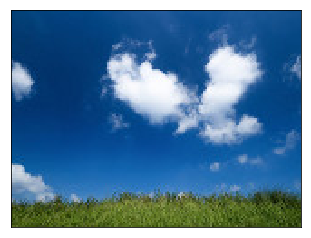

Landscape image:  (120, 160, 3)
(19200, 3)
2 clusters: Convergence is reached after 5 iterations


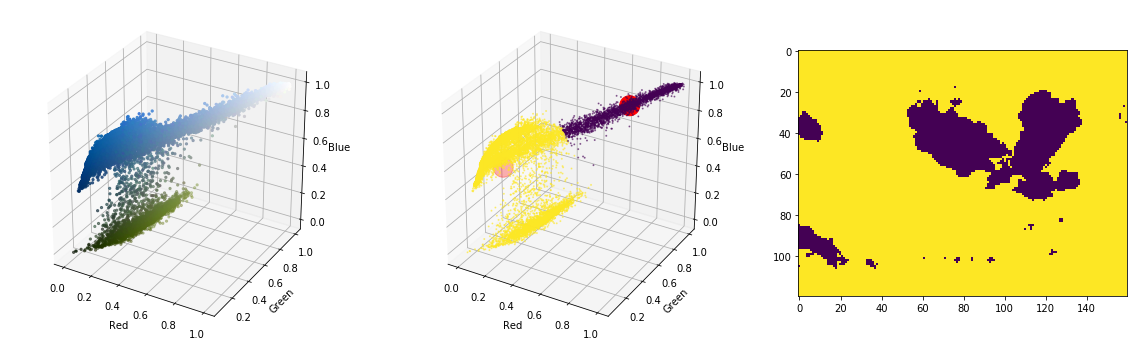

Santa Claus image:  (120, 160)




3 clusters: Convergence is reached after 7 iterations


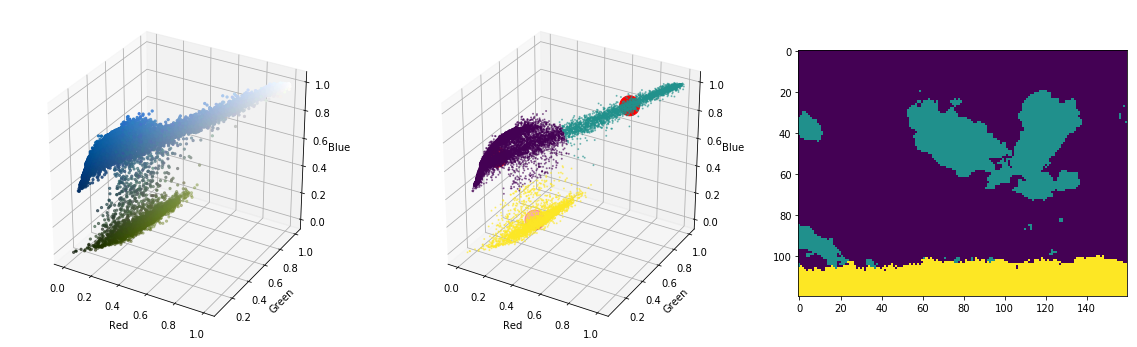

Santa Claus image:  (120, 160)




4 clusters: Convergence is reached after 9 iterations


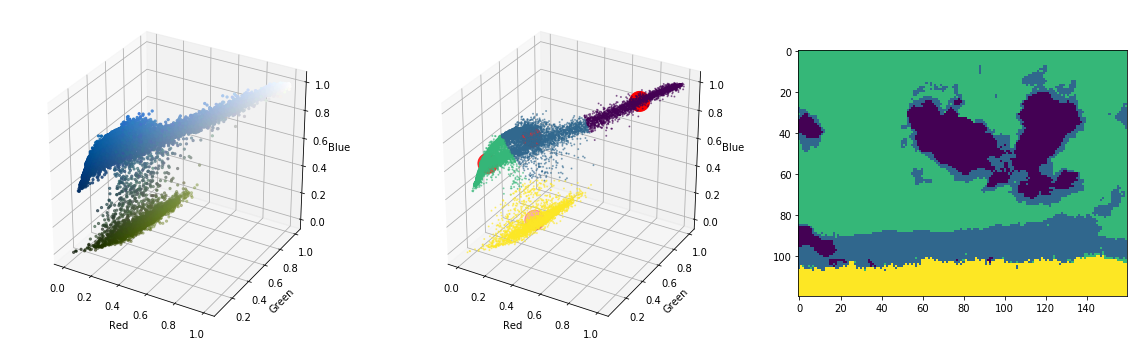

Santa Claus image:  (120, 160)




5 clusters: Convergence is reached after 8 iterations


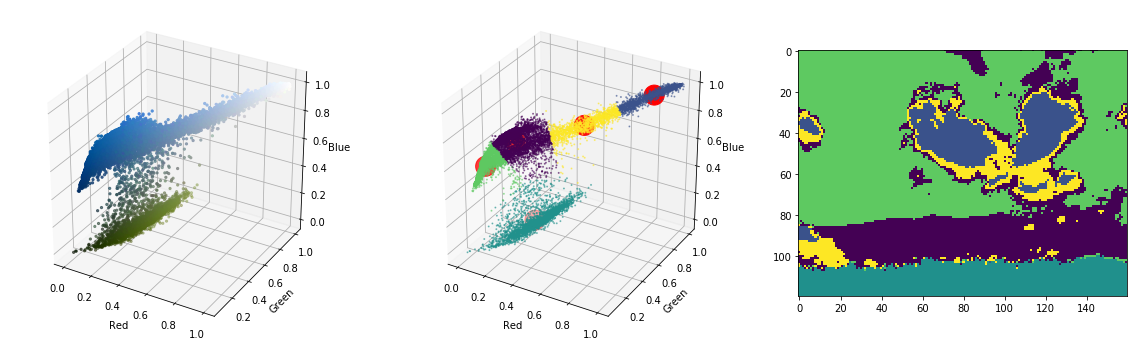

Santa Claus image:  (120, 160)




6 clusters: Convergence is reached after 14 iterations


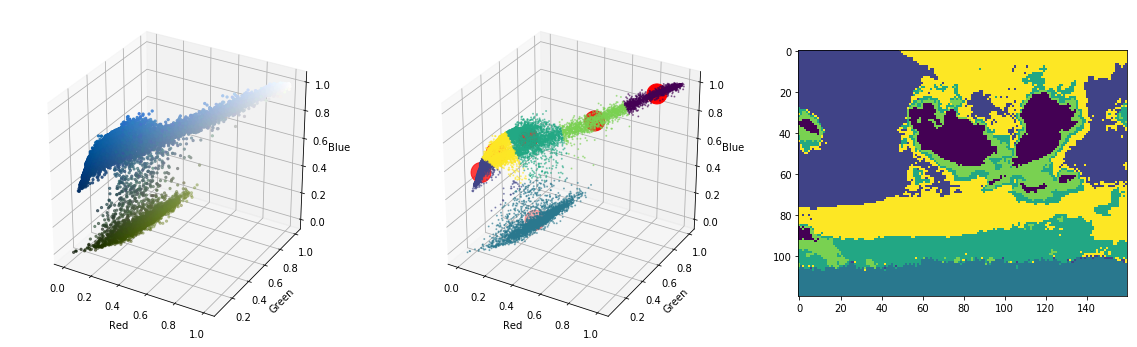

Santa Claus image:  (120, 160)




7 clusters: Convergence is reached after 10 iterations


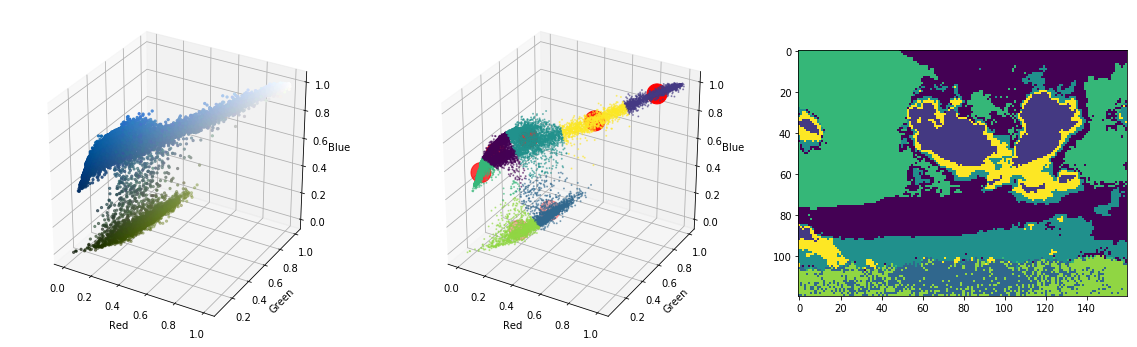

Santa Claus image:  (120, 160)




8 clusters: Convergence is reached after 12 iterations


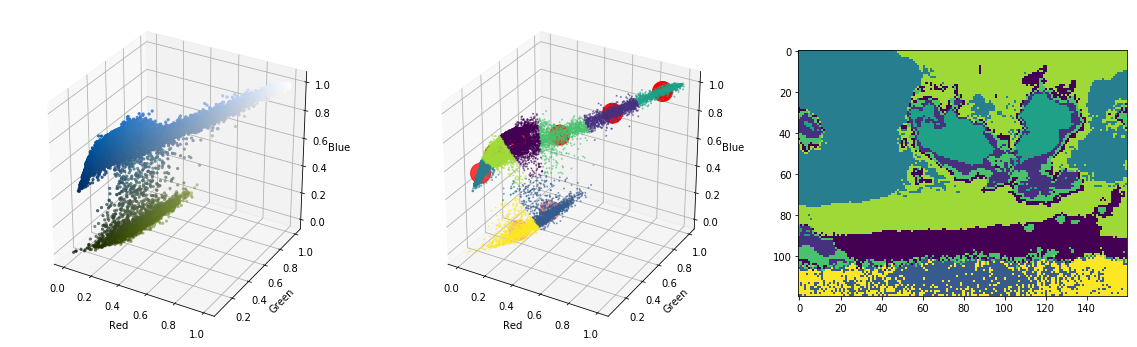

Santa Claus image:  (120, 160)




9 clusters: Convergence is reached after 12 iterations


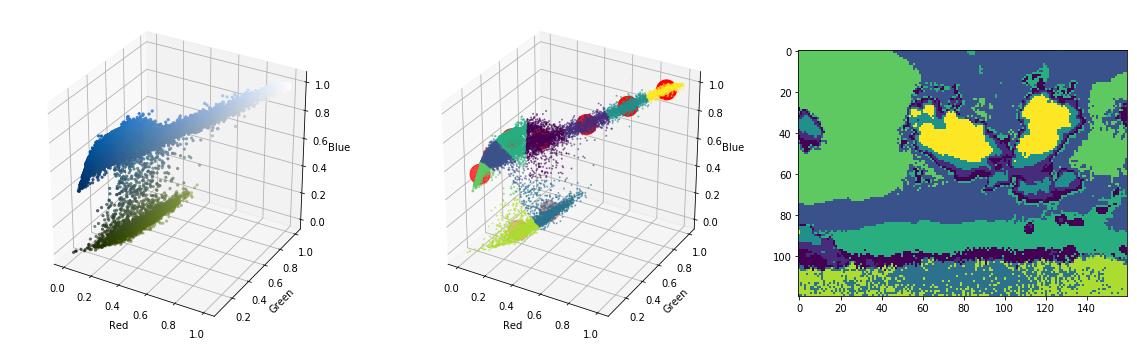

Santa Claus image:  (120, 160)




10 clusters: Convergence is reached after 18 iterations


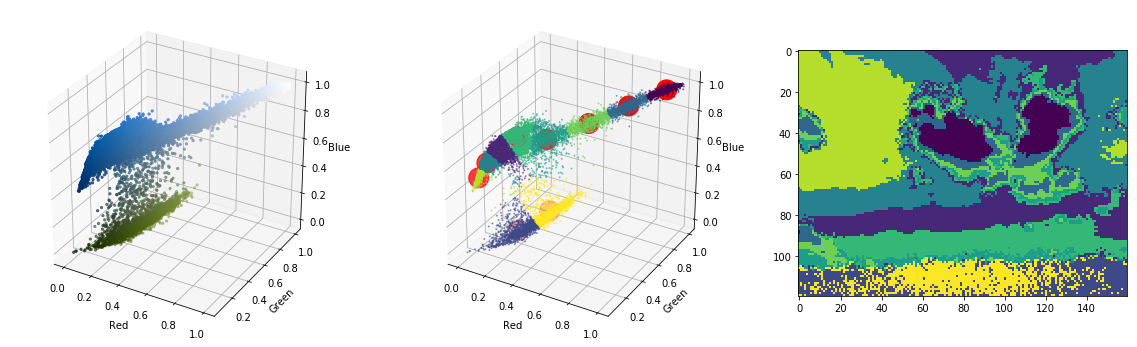

Santa Claus image:  (120, 160)




11 clusters: Convergence is reached after 17 iterations


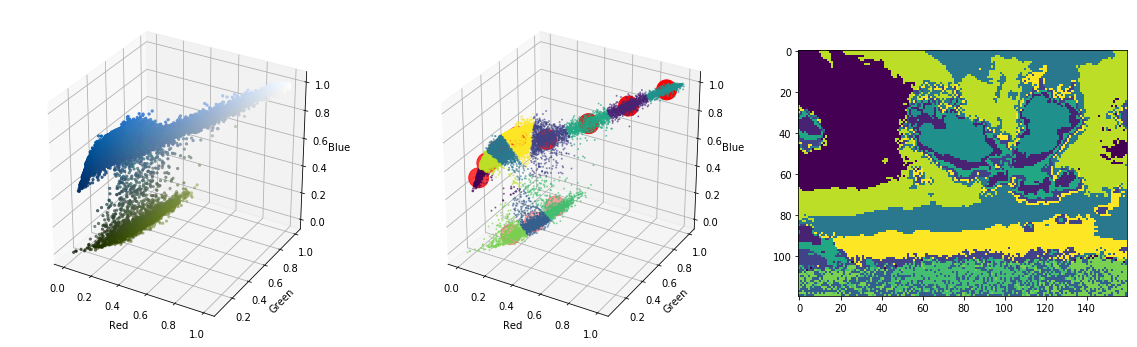

Santa Claus image:  (120, 160)




12 clusters: Convergence is reached after 21 iterations


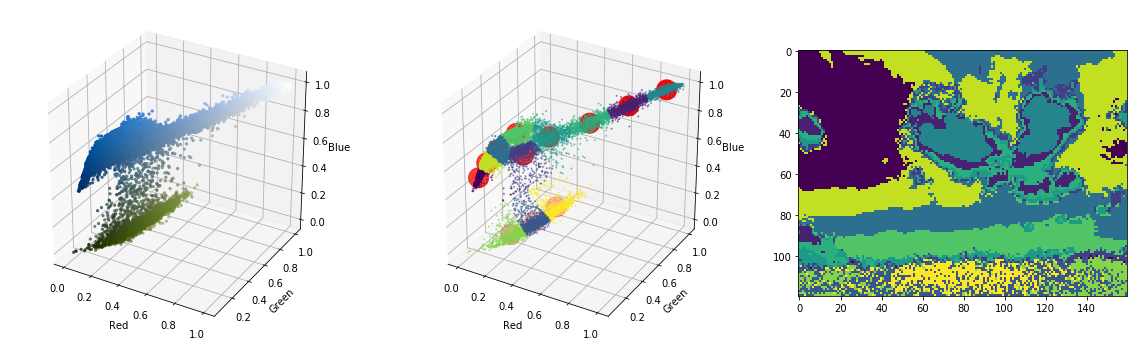

Santa Claus image:  (120, 160)




13 clusters: Convergence is reached after 15 iterations


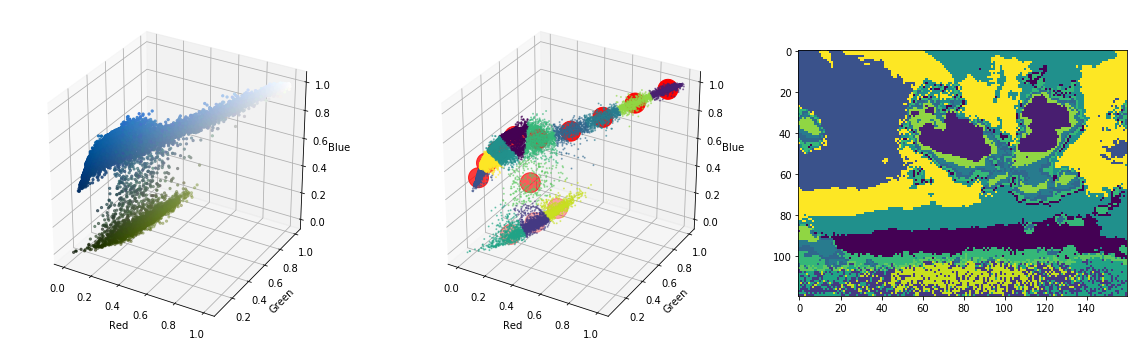

Santa Claus image:  (120, 160)




14 clusters: Convergence is reached after 22 iterations


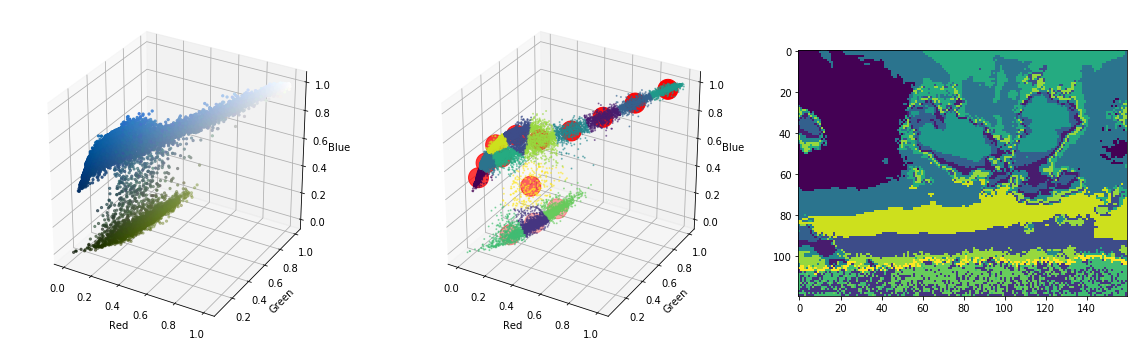

Santa Claus image:  (120, 160)




15 clusters: Convergence is reached after 67 iterations


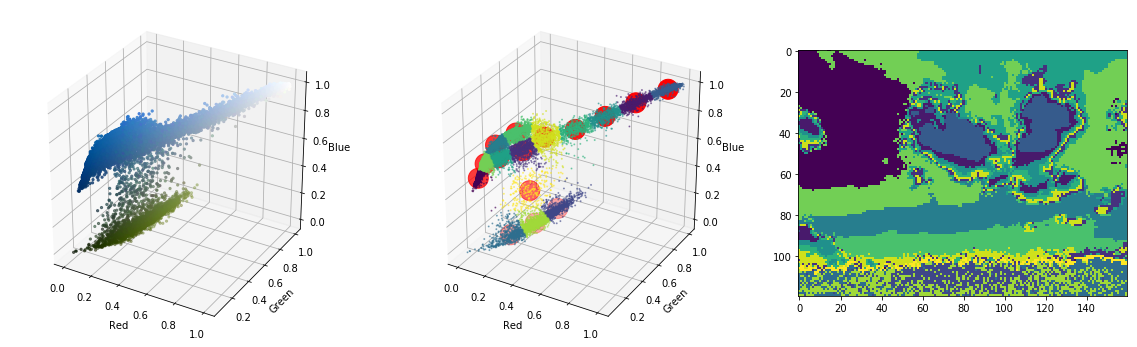

Santa Claus image:  (120, 160)






In [13]:
ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
print(data.shape)

for k in range(2,16):
    
    kmeans =  KMeans(n_clusters=k, random_state=0, n_init = 10).fit(data)
    new_clusters = kmeans.predict(data)

    print(k, 'clusters:','Convergence is reached after', kmeans.n_iter_, 'iterations')   
    
    fig = pyplot.figure(figsize=(20,6))
    
    axis = fig.add_subplot(1, 3, 1, projection="3d")
    r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

    axis.scatter(r, g, b, c=data, s=5, marker="o")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    #pyplot.show()


    #fig = pyplot.figure()      #(figsize=(4,4))
    axis = fig.add_subplot(1, 3, 2, projection="3d")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(r, g, b, marker="o", c = new_clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', s=400, zorder=10)
    #pyplot.show()

    # ADD CODE TO DISPLAY THE IMAGE OBTAINED WITH YOUR CODE
    seg_image2_sklearn = deepcopy ( kmeans.labels_.reshape(image2.shape[0],image2.shape[1]))
    axis = fig.add_subplot(1, 3, 3)
    #axis = plt.axes(xticks=[], yticks=[])
    axis.imshow(seg_image2_sklearn)
    plt.show()
    print("Santa Claus image: ",seg_image2_sklearn.shape)
    
    print('\n')
    print('\n')

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

2 clusters: Convergence is reached after 5 iterations
3 clusters: Convergence is reached after 7 iterations
4 clusters: Convergence is reached after 9 iterations
5 clusters: Convergence is reached after 8 iterations
6 clusters: Convergence is reached after 14 iterations
7 clusters: Convergence is reached after 10 iterations
8 clusters: Convergence is reached after 12 iterations
9 clusters: Convergence is reached after 12 iterations
10 clusters: Convergence is reached after 18 iterations
11 clusters: Convergence is reached after 17 iterations
12 clusters: Convergence is reached after 21 iterations
13 clusters: Convergence is reached after 15 iterations
14 clusters: Convergence is reached after 22 iterations
15 clusters: Convergence is reached after 67 iterations


Text(0,0.5,'Error')

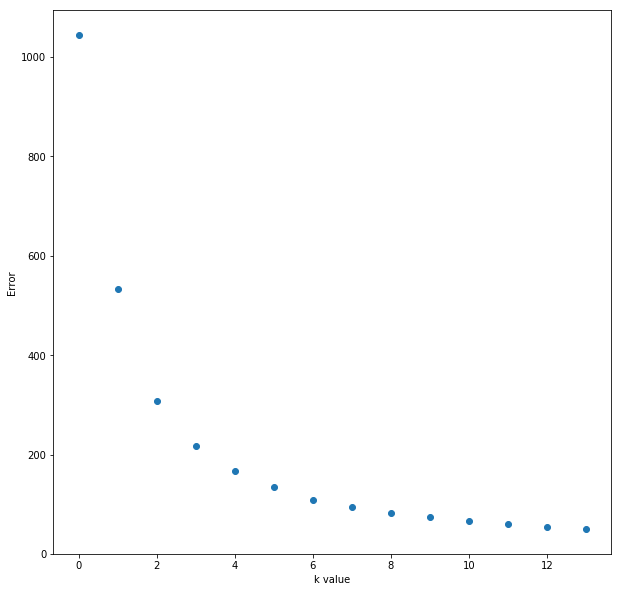

In [14]:
# ADD YOUR CODE FOR PLOTTING    

fig = pyplot.figure(figsize = (10,10))
 
error = []

for k in range(2,16):

    kmeans =  KMeans(n_clusters=k, random_state=0, n_init = 10).fit(data)
    new_clusters = kmeans.predict(data)

    print(k, 'clusters:', 'Convergence is reached after', kmeans.n_iter_, 'iterations') 
    
    error.append(kmeans.inertia_)
    
axis = fig.add_subplot(1,1,1)   
axis.plot(error,'o')
axis.set_xlabel('k value')
axis.set_ylabel('Error')

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

[ADD YOUR ANSWERS HERE]

I observe that increasing the value of k, the segmentation of the image becomes richer of details. Moreover, I think that if we increased the number of clusters, we would obtain a image similar to the original one. In this case the error would be zero. 
Therefore, increasing the number of clusters, the clustering procedure becomes useless, because we have no more a segmentated image and a compression of it.
Hence, looking at the error plot, the optimal number of clusters resides in the elbow of the curve, that is the middle between a poor number of clusters and an exceeding one.

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [15]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [16]:
# #############################################################################
# Compute Agglomerative Clustering

db = AgglomerativeClustering(n_clusters=2,linkage='single').fit(X)

print('Number of clusters:', db.n_clusters_)
print('Number of connected components in the graph:', db.n_connected_components_)
print('Number of leaves in the hierarchical tree:', db.n_leaves_)


Number of clusters: 2
Number of connected components in the graph: 1
Number of leaves in the hierarchical tree: 1500


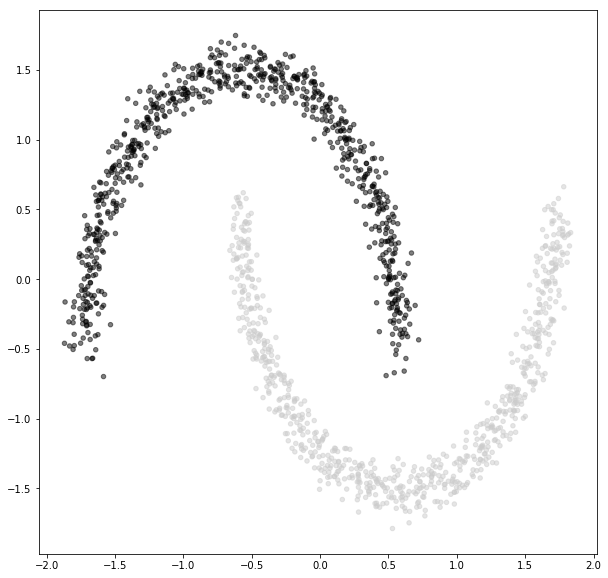

In [17]:
# Plot result
fig = pyplot.figure(figsize=(10,10))  
axis = fig.add_subplot(1, 1,1)
axis.scatter(X[:, 0], X[:, 1], c=db.labels_, cmap=plt.cm.nipy_spectral, alpha = 0.5,s=20)
pyplot.show()

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

Convergence is reached after 5 iterations


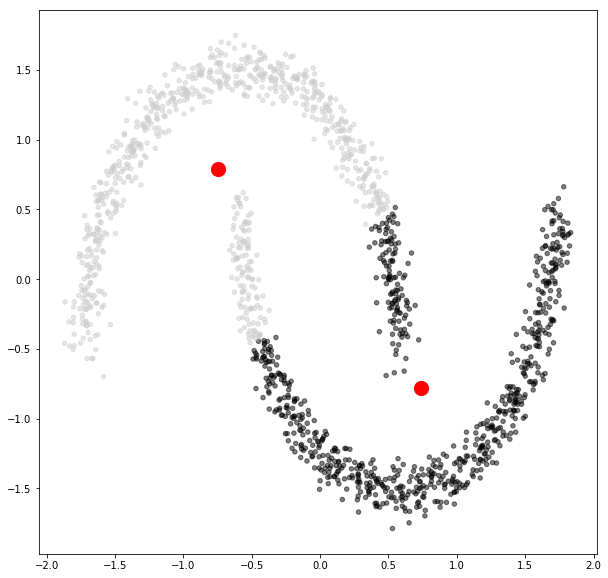

In [18]:
kmeans =  KMeans(n_clusters=2, random_state=0, n_init = 10).fit(X)
new_clusters = kmeans.predict(X)
kmeans.labels_
kmeans.cluster_centers_

print('Convergence is reached after', kmeans.n_iter_, 'iterations')

fig = pyplot.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1,)
axis.scatter(X[:, 0], X[:, 1], marker="o", c = new_clusters, s=20, cmap=plt.cm.nipy_spectral, zorder=0, alpha = 0.5)
axis.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', s=200, zorder=10)
pyplot.show()

# Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?


[ADD YOUR ANSWER HERE]

The results obtained by the two algorithm are different. For the K-means, the data points are assigned to the closest clusters centroids. For the agglomerative clusters, the data points are assigned minimizing the cluster distance. Therefore, the two methods are conceptually different and that is why we obtain two different results. Depending on the task, the algorithm used for clustering can be different for obtaining a better result. In this case, for this dataset, the best metod seems to be the Agglomerative Clustering.